In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
data = read.csv('data/clinical_trial.csv.xz',
                stringsAsFactors=F)
summary(data)
str(data)

    title             abstract             trial       
 Length:1860        Length:1860        Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :0.0000  
                                       Mean   :0.4392  
                                       3rd Qu.:1.0000  
                                       Max.   :1.0000  

'data.frame':	1860 obs. of  3 variables:
 $ title   : chr  "Treatment of Hodgkin's disease and other cancers with 1,3-bis(2-chloroethyl)-1-nitrosourea (BCNU; NSC-409962)." "Cell mediated immune status in malignancy--pretherapy and post-therapy assessment." "Neoadjuvant vinorelbine-capecitabine versus docetaxel-doxorubicin-cyclophosphamide in early nonresponsive breast cancer: phase "| __truncated__ "Randomized phase 3 trial of fluorouracil, epirubicin, and cyclophosphamide alone or followed by Paclitaxel for early breast can"| __truncated__ ...
 $ abstract: chr  "" "Twenty-eight cases of malignancies of different kinds were studied to assess T-cell activity and population before and after in"| __truncated__ "BACKGROUND: Among breast cancer patients, nonresponse to initial neoadjuvant chemotherapy is associated with unfavorable outcom"| __truncated__ "BACKGROUND: Taxanes are among the most active drugs for the treatment of metastatic breast cancer, and, as a consequence, they "| __trunc

In [8]:
table(nchar(data$abstract) > 0)


FALSE  TRUE 
  112  1748 

In [11]:
m = which.min(nchar(data$title))
m
data$title[m]

[1] 1258

[1] "A decade of letrozole: FACE."

In [12]:
library(tm)

Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate



In [58]:
corpusTitle = Corpus(VectorSource(data$title))
corpusAbstract = Corpus(VectorSource(data$abstract))

corpusTitle = tm_map(corpusTitle, tolower)
corpusAbstract = tm_map(corpusAbstract, tolower)

corpusTitle = tm_map(corpusTitle, PlainTextDocument)
corpusAbstract = tm_map(corpusAbstract, PlainTextDocument)

corpusTitle = tm_map(corpusTitle, removePunctuation)
corpusAbstract = tm_map(corpusAbstract, removePunctuation)

corpusTitle = tm_map(corpusTitle, removeWords,
                     stopwords('english'))
corpusAbstract = tm_map(corpusAbstract, removeWords,
                        stopwords('english'))

corpusTitle = tm_map(corpusTitle, stemDocument)
corpusAbstract = tm_map(corpusAbstract, stemDocument)

dtmTitle = DocumentTermMatrix(corpusTitle)
dtmAbstract = DocumentTermMatrix(corpusAbstract)

dtmTitle = removeSparseTerms(
    dtmTitle, 0.95)
dtmAbstract = removeSparseTerms(
    dtmAbstract, 0.95)

dtmTitle = as.data.frame(as.matrix(dtmTitle))
dtmAbstract = as.data.frame(as.matrix(dtmAbstract))

In [59]:
dim(dtmTitle)
dim(dtmAbstract)

[1] 1860   31

[1] 1860  335

In [60]:
tail(sort(colSums(dtmAbstract)))
which.max(colSums(dtmAbstract))

chemotherapi        group    treatment       cancer       breast      patient 
        2344         2668         2894         3726         3859         8381

patient 
    212

In [61]:
colnames(dtmTitle) = paste0(
    'T', colnames(dtmTitle))
colnames(dtmAbstract) = paste0(
    'A', colnames(dtmAbstract))

In [63]:
dtm = cbind(dtmTitle, dtmAbstract)
dtm$trial = data$trial
dim(dtm)
#colnames(dtm)
#dtm$trial

Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

[1] 1860  367

In [43]:
library(caTools)

In [55]:
str(dtm$trial)

 int [1:1860] 1 0 1 1 1 0 1 0 0 0 ...


In [64]:
set.seed(144)
spl = sample.split(dtm$trial, 0.7)
train = subset(dtm, spl==T)
test = subset(dtm, spl==F)

In [65]:
table(train$trial)
#train$
#head(train)


  0   1 
730 572 

In [67]:
730/(730+572)

[1] 0.5606759

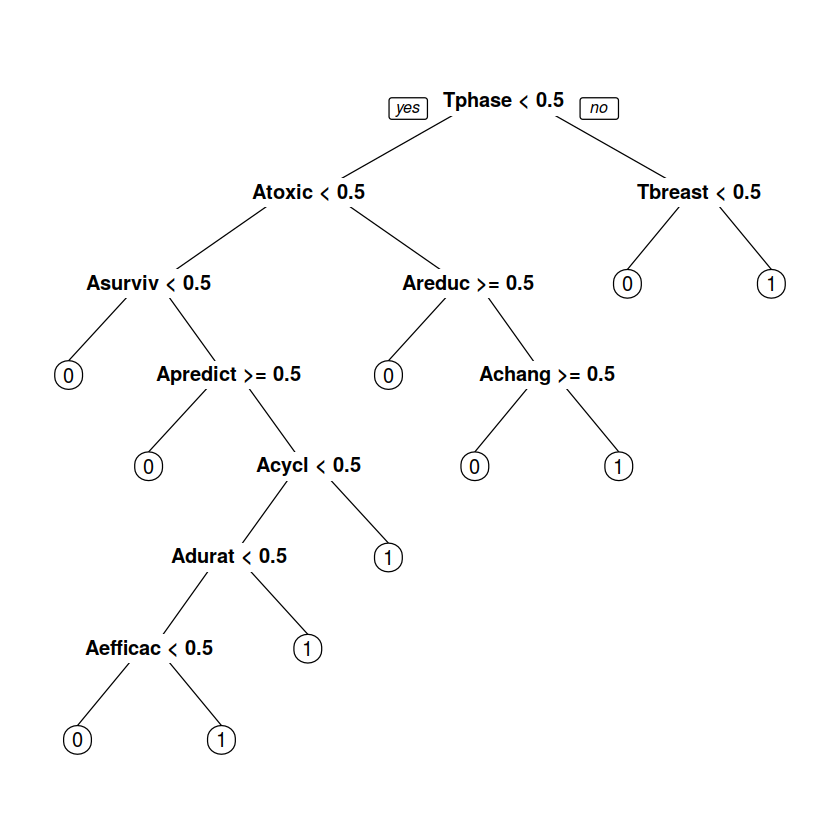

In [68]:
library(rpart)
library(rpart.plot)
trialCART = rpart(trial ~ ., data=train,
                  method='class')
prp(trialCART)

In [71]:
#pred = predict(trialCART, newdata=test,
#               type='class')
#trialCART$
trainPred = predict(trialCART)[,2]
max(trainPred)

[1] 0.8718861

In [73]:
t = table(train$trial, trainPred >= 0.5)
t

   
    FALSE TRUE
  0   631   99
  1   131  441

In [78]:
# accuracy: TP+TN/(n observations)
sum(diag(t))/sum(t)
# sensitivity: TP/(TP+FN)
(441)/(441+131)
# specificity: TN/(TN+FP)
(631)/(631+99)

[1] 0.8233487

[1] 0.770979

[1] 0.8643836

In [84]:
predTest = predict(trialCART, newdata=test,
                   type='class')
t = table(test$trial, predTest)
t
sum(diag(t))/sum(t)

   predTest
      0   1
  0 261  52
  1  83 162

[1] 0.7580645

In [97]:
library(ROCR)
predROC = predict(trialCART, newdata=test)
pred = prediction(predROC[,2], test$trial)
# AUC
as.numeric(performance(pred, 'auc')@y.values)

[1] 0.8371063